In [1]:
from google.colab import drive
drive.mount('/content/drive')

filepath_drive = "/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/data-engineering-utokyo/notebooks

/content/drive/MyDrive/data-engineering-utokyo/notebooks


In [7]:
import sys
sys.path.insert(0,'..')

from datetime import datetime

from src.constants.mot_constants import c_ccd, c_cmos_Fr_20220918
from src.recorders.ssd_recorder import SSDRecorder
from src.recorders.file_recorder import FileRecorder
from src.analyses.analysis import ResultParameter
from src.analyses.ssd_analysis import SSDAnalysis
from src.analyses.image_analysis import ImageAnalysis
from src.analyses.mkdir import create_folders
from src.analyses.runner import Runner
from src.analyses.fit_mot_number import MOTMLE

In [8]:
# Input 
image_folder = f"{filepath_drive}/mot_data/"
match = ".*20220919-.*cmos.*.csv" # ".*20220919-.*ccd_detuning.*.xlsx"
c = c_cmos_Fr_20220918
min_signal = 0
time_interval = (
    datetime(2022, 9, 18, 9, 0, 0), 
    datetime(2022, 9, 20, 21, 0, 0)
    )
use_n_reference_images = 100
dead_pixel_percentile = 5.0 # [%], must between 0 and 100

# Output 
run_name = "all_images_minsignal_0"
plot_path = f"{filepath_drive}/plots/{run_name}/" 
result_path = f"{filepath_drive}/results/{run_name}/" 

In [10]:
# Make dirs
create_folders(plot_path, result_path)

# Setup result parameters
result_param_image = ResultParameter(
    image_src=plot_path+"image/",
    image_extension=".png",
    result_filepath=result_path+"image_analysis_results.csv"
    )

# Setup recorders
image_recorder = FileRecorder(
    filepath=image_folder,
    match=match 
    )

# Setup analyses
reference_image_filepaths = image_recorder.get_table().head(use_n_reference_images)["filepath"]

In [12]:
image_recorder.get_table().sort_values(by=['filepath'])

,filename,filename_with_extension,filepath,mtime,ctime,timestamp,datetime
3124,cmos_000032,cmos_000032.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663559e+09,1.663666e+09,2022-09-20 09:31:48.000000,2022-09-20 09:31:48
3215,cmos_000034,cmos_000034.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663559e+09,1.663666e+09,2022-09-20 09:31:49.000000,2022-09-20 09:31:49
3096,cmos_000035,cmos_000035.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663559e+09,1.663666e+09,2022-09-20 09:31:47.000000,2022-09-20 09:31:47
2,cmos_000037,cmos_000037.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663559e+09,1.663666e+09,2022-09-20 09:31:48.000000,2022-09-20 09:31:48
3434,cmos_000038,cmos_000038.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663559e+09,1.663666e+09,2022-09-20 09:31:49.000000,2022-09-20 09:31:49
...,...,...,...,...,...,...,...
2004,cmos_068857,cmos_068857.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663589e+09,1.663667e+09,2022-09-20 09:37:01.000000,2022-09-20 09:37:01
2112,cmos_068859,cmos_068859.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663589e+09,1.663667e+09,2022-09-20 09:43:45.000000,2022-09-20 09:43:45
3341,cmos_068860,cmos_068860.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663589e+09,1.663667e+09,2022-09-20 09:37:01.000000,2022-09-20 09:37:01
867,cmos_068862,cmos_068862.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663589e+09,1.663667e+09,2022-09-20 09:38:33.000000,2022-09-20 09:38:33


There were 3249 pixels with non-zero std and 0 pixels with zero std.
AxesSubplot(0.125,0.536818;0.352273x0.343182)
[[23.5 26.  18.5 ... 23.  23.  22. ]
 [21.5 30.  23.  ... 28.  34.  27. ]
 [18.5 19.  22.  ... 26.  22.  17. ]
 ...
 [20.  19.  23.  ... 18.  36.  22. ]
 [18.  18.  18.  ... 22.  22.  21. ]
 [20.  17.  66.5 ... 18.  19.5 19. ]]
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
[[0.04255319 0.03846154 0.05405405 ... 0.04347826 0.04347826 0.04545455]
 [0.04651163 0.03333333 0.04347826 ... 0.03571429 0.02941176 0.03703704]
 [0.05405405 0.05263158 0.04545455 ... 0.03846154 0.04545455 0.05882353]
 ...
 [0.05       0.05263158 0.04347826 ... 0.05555556 0.02777778 0.04545455]
 [0.05555556 0.05555556 0.05555556 ... 0.04545455 0.04545455 0.04761905]
 [0.05       0.05882353 0.01503759 ... 0.05555556 0.05128205 0.05263158]]
AxesSubplot(0.125,0.125;0.352273x0.343182)
[[ 15.71540327  15.86872396  18.77323627 ... 434.55741853 445.07125486
  450.44064859]
 [ 18.18492782  16.51632828  18.45

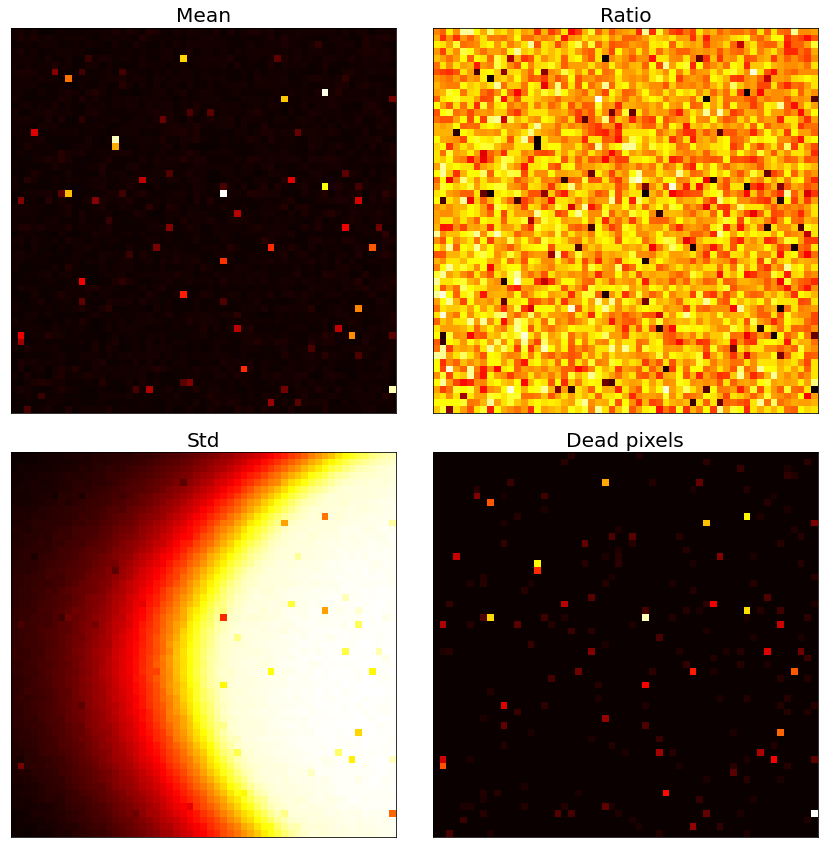


Image Analysis: New data -> Run analysis
Array before subtraction:  [14.46742787 17.56759099 19.6343664  ... 14.46742787 14.46742787
 13.43404017] with sum 61170.35181429601
Array after subtraction:  [14.46742787 17.56759099 19.6343664  ... 14.46742787 14.46742787
 13.43404017] with sum 51202.35181429601
The image will be analyzed, the total signal is 51202.35181429601 > 0 + 9968.0 after subtraction of the background of 9968.0.
mu_x = 0.0003359273012854251 mean x = 0.00032216099999999995
mu_y = 0.0004151665813228446 mean y = 0.00041420700000000004
sigma_x = 2.4338409714266684e-05 std_x = 2.610924502929949e-05
sigma_y = 2.693910990502521e-05 std_y = 2.6109245029299497e-05
RuntimeError in fit: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.


SystemError: ignored

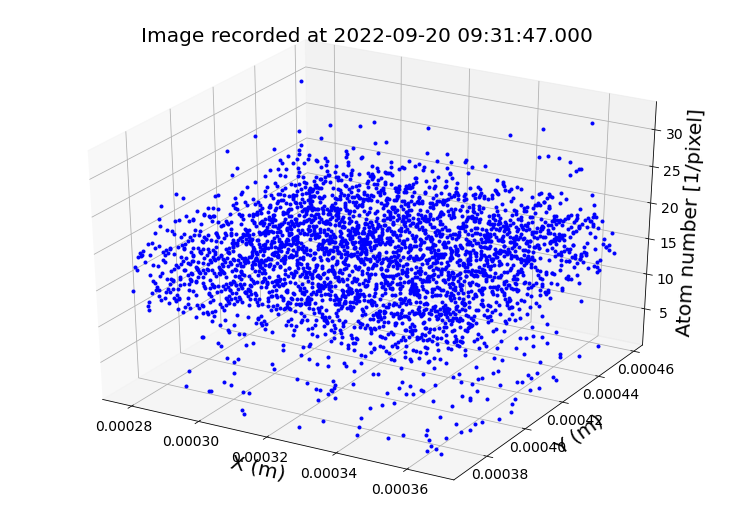

In [13]:
perform_analysis = MOTMLE(c=c, 
                          references=reference_image_filepaths,
                          do_subtract_dead_pixels=True,
                          dead_pixel_percentile=dead_pixel_percentile).perform_analysis
image_analysis = ImageAnalysis(
    recorder=image_recorder,
    perform_analysis=perform_analysis, 
    result_param=result_param_image,
    min_signal=min_signal,
    time_interval=time_interval
    )
    
# Setup runner
runner = Runner(analyses=[image_analysis])
runner.run(cycles=3*12*60, period_s=5)

In [15]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	../src/notebooks/__init__.py
	../src/notebooks/beamtime_analysis.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [16]:
git add *

SyntaxError: ignored

In [17]:
!git add .

In [18]:
!git status

git: 'stats' is not a git command. See 'git --help'.

The most similar command is
	status
